<a href="https://colab.research.google.com/github/kykytsapol/-YouTube-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D1%81%D0%B5%D0%BD%D1%82%D0%B8%D0%BC%D0%B5%D0%BD%D1%82_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel("10к_сентиментов.xlsx",index_col=0)
df.head()

,text_clear,label
91169,нетленка сети стесняемся заходим смотрим оцени...,1
102625,азаза ванга разрешила спокоен,1
129280,сегодня последняя серия молодежки пойду поплач...,0
43840,красивый желанный пока произнёс слова дзеуки д...,1
141571,чет сегодня радио т лагает детски,0


In [ ]:
df.groupby('label').label.count()

label
0    49340
1    50660
Name: label, dtype: int64

In [ ]:
X = df['text_clear']
y = df['label']

делим выборку на обучающую и тестовую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2
vectorizer = CountVectorizer(min_df=2, max_features=10000)
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
train_vectors = vectorizer.fit_transform(X_train.values.astype('U'))
test_vectors = vectorizer.transform(X_test.values.astype('U'))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# обучаю модель на тестовом сете
model = LogisticRegression()
model.fit(train_vectors, y_train)
 
# предсказываю результаты и вывожу оценку предсказания
predictions = model.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68     16263
           1       0.69      0.72      0.71     16737

    accuracy                           0.70     33000
   macro avg       0.70      0.69      0.69     33000
weighted avg       0.70      0.70      0.70     33000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Можно посмотреть какие слова наиболее важные для негативной и позитивной оценки. 

In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, 
                               top_positive_coefficients])
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < top_features else 'blue' 
           for c in range(0, top_features*2)]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xlabel("Features")
 plt.ylabel("Feature coeficient")
 plt.title("Most important features")
 plt.xticks(np.arange(0.5, 0.5+2 * top_features), 
            feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


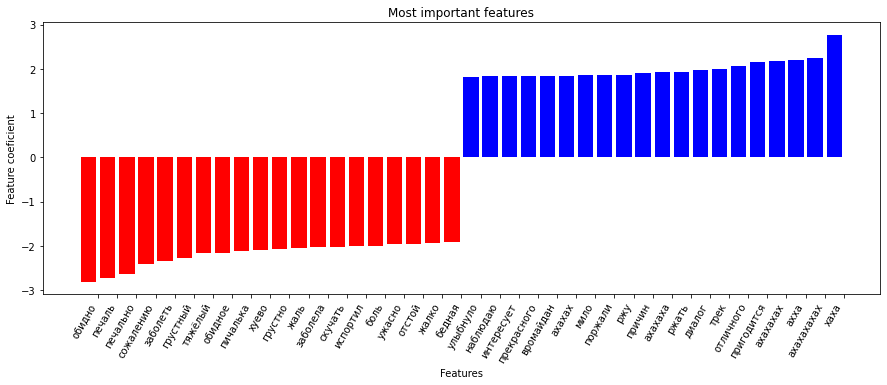

In [ ]:
plot_coefficients(model, vectorizer.get_feature_names())

Далее с помощью сетки попробуем подобрать опимальные гипермараметры для модели 

Можно комбинировать различиные гиперпараметры, я решила рассмотреть, такие как "штраф" (penalty) и обратная сила регуляризации (С)

In [ ]:
param_grid = [{'penalty': ['l1', 'l2'],
               'C': [1.0, 10.0, 100.0]}]

In [ ]:
lr = LogisticRegression()

print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
grid_logic = GridSearchCV(LogisticRegression(), param_grid)

In [ ]:
grid_logic.fit(train_vectors, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': [1.0, 10.0, 100.0], 'penalty': ['l1', 'l2']}])

Смотрим какие параметры были подобраны по сетке на основе самого высокого значения точности

In [ ]:
print('Best parameter set: ' + str(grid_logic.best_params_))
print('Best accuracy: %.3f' % grid_logic.best_score_)

Best parameter set: {'C': 1.0, 'penalty': 'l2'}
Best accuracy: 0.692


In [ ]:
# теперь посмотрим как наша модель работает на данных, которые она никогда не видела - на тестовом множестве
grid_predictions = grid_logic.predict(test_vectors)
 
# смотрим на classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68     16263
           1       0.69      0.72      0.71     16737

    accuracy                           0.70     33000
   macro avg       0.70      0.69      0.69     33000
weighted avg       0.70      0.70      0.70     33000



Построим график roc кривой, для того, чтобы визуализировать предсказательную силу модели 

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def get_roc_curve(model, X, y):
    pred = grid_logic.predict(X)
    fpr, tpr, _ = roc_curve(y, pred)
    return fpr, tpr

In [ ]:
roc_svm = get_roc_curve(grid_logic.best_estimator_, test_vectors, y_test)

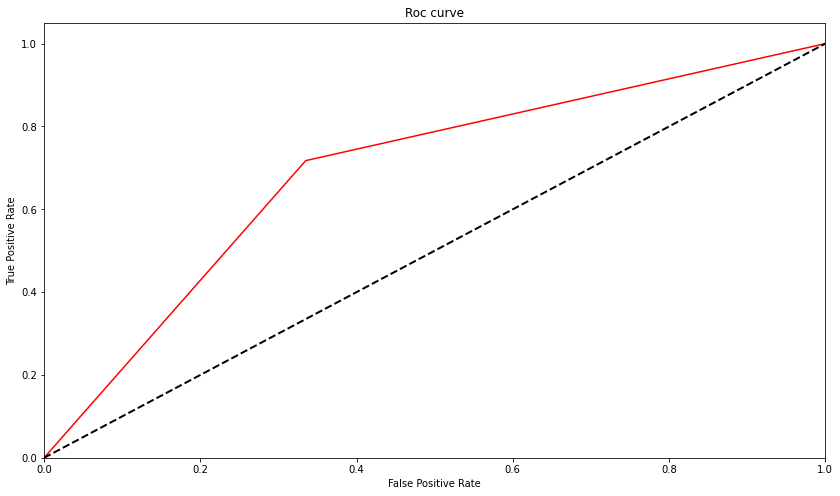

In [ ]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

Если сравнивать с графиком для SVM, то логистическая регрессия показывает более хорошие результаты. Прямая имеет более явный изгиб, стремящийся к левому верхнему иглу (к максимальной проивзодиельности модели).

Можно еще вывеси матрицу ошибок 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns

Text(23.999999999999996, 0.5, 'Actual')

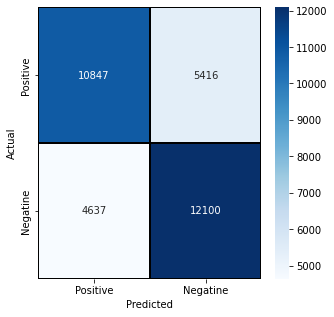

In [ ]:
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Positive','Negatine'], 
            yticklabels = ['Positive','Negatine'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Посмотрим как модель предсказывает тональность топиков (по ключевым словам).

In [ ]:
data2 = pd.read_excel("только_топики_доковида.xlsx", index_col = 0)
data2.head()

,Ключевые_слова
Топик,
0,"расклад, знать, благодарить, хороший, отношени..."
1,"таро, благодарить, видео, огромный, большой, к..."
2,"карта, колода, вопрос, таро, говорить, мир, ар..."


In [ ]:
topic = vectorizer.transform(data2["Ключевые_слова"])

In [ ]:
sentiment_topic = grid_logic.predict(topic)

In [ ]:
data2['sentiment_text'] = sentiment_topic
data2

,Ключевые_слова,sentiment_text
Топик,,
0,"расклад, знать, благодарить, хороший, отношени...",1
1,"таро, благодарить, видео, огромный, большой, к...",1
2,"карта, колода, вопрос, таро, говорить, мир, ар...",0


Результаты уже более логигичные с содержательной точки зрения. Но последний топик был оценен как негативный, хотя на самом деле, он выражает скорее позитивную тональность.